In [ ]:
#   Naive Bayes
#   Pr[H|E] = Pr[H|E1]*Pr[H|E2]*Pr[H|E3]*Pr[H|E4]
#   Probability of an event H given attributes E

# Assumes evidence attributes are independent

# Zero values throw the whole thing off
# You can replace zeros with an average probability or some weighting

# Missing values have no effect on the formula so it's all good with missings

In [53]:
# load iris data set
# multiclassification on continuous features
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from scipy.stats import norm

data=load_iris()
X, y, column_names=data['data'], data['target'], data['feature_names']
X = pd.DataFrame(X, columns=column_names)

In [54]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=44)

In [55]:
#fit 
#stats for the train set
means=X_train.groupby(y_train).apply(np.mean)
stds=X_train.groupby(y_train).apply(np.std)

print(means)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.016216          3.443243           1.456757          0.256757
1           5.900000          2.747368           4.281579          1.342105
2           6.624324          3.013514           5.529730          2.045946


In [57]:
# class prior probabilities
probs = X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]
print(probs)

0    0.330357
1    0.339286
2    0.330357
dtype: float64


In [58]:
print(np.unique(y_train))

[0 1 2]


In [59]:
print(X_val)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
144                6.7               3.3                5.7               2.5
9                  4.9               3.1                1.5               0.1
79                 5.7               2.6                3.5               1.0
95                 5.7               3.0                4.2               1.2
104                6.5               3.0                5.8               2.2
47                 4.6               3.2                1.4               0.2
118                7.7               2.6                6.9               2.3
107                7.3               2.9                6.3               1.8
102                7.1               3.0                5.9               2.1
90                 5.5               2.6                4.4               1.2
17                 5.1               3.5                1.4               0.3
52                 6.9               3.1                4.9     

In [4]:
y_pred=[]
#for each element in the validation set
for elem in range(X_val.shape[0]):
    p={}
    #for each possible class
    for cl in np.unique(y_train):
        #take the prior probability of the given class
        p[cl]=probs.iloc[cl]
        #for each column in the data
        for index, param in enumerate(X_val.iloc[elem]):
            #multiply the probability of the given column value to belong to the distribution 
            #of the train column for the given class
            p[cl]*=norm.pdf(param, means.iloc[cl, index], stds.iloc[cl, index])
    y_pred.append(pd.Series(p).values.argmax())
            

In [10]:
#my classifier
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.9210526315789473

In [9]:
#we did the math manually for this below:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

accuracy_score(y_val, model.predict(X_val))

0.9210526315789473

In [ ]:
https://towardsdatascience.com/implementing-naive-bayes-in-2-minutes-with-python-3ecd788803fe

In [ ]:
https://stackabuse.com/generating-synthetic-data-with-numpy-and-scikit-learn/

In [ ]:
#Cool. Let's create some synthetic data to see how this would work in practice

In [11]:
import numpy as np

# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [12]:
# Define the seed so that results can be reproduced
seed = 33
rand_state = 33

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

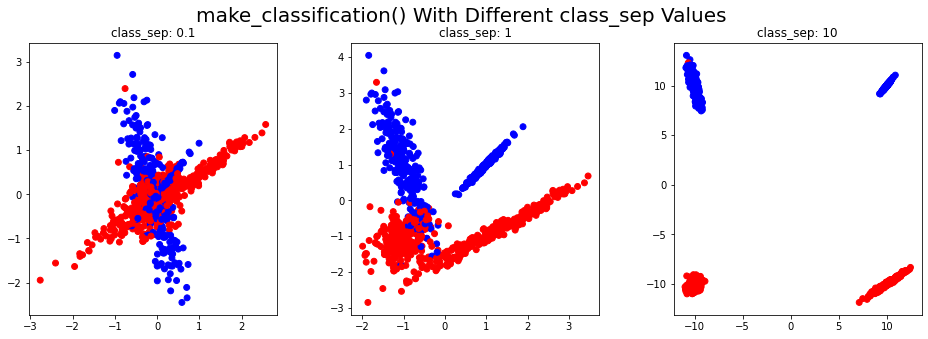

In [13]:
#synthetic data are pretty cool
fig,ax = plt.subplots(nrows=1, ncols=3,figsize=(16,5))
plt_ind_list = np.arange(3)+131

for class_sep,plt_ind in zip([0.1,1,10],plt_ind_list):
    x,y = dt.make_classification(n_samples=1000,
                                 n_features=2,
                                 n_repeated=0,
                                 class_sep=class_sep,
                                 n_redundant=0,
                                 random_state=rand_state)
    
    plt.subplot(plt_ind)
    my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=y,
                                  vmin=min(y),
                                  vmax=max(y),
                                  s=35,
                                  cmap=color_map_discrete)
    plt.title('class_sep: '+str(class_sep))

fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.suptitle('make_classification() With Different class_sep Values',fontsize=20)
plt.show()

In [443]:
#okay. Let's make some data for a classification problem
#100 observations
obs=100
X, y = dt.make_classification(n_samples=obs,
                                 n_features=10,
                                 n_repeated=0,
                                 class_sep=1,
                                 n_redundant=3,
                                 random_state=rand_state)

In [444]:
df = pd.DataFrame(np.c_[X, y])
df.shape
#10 features and 1 class

(100, 11)

In [445]:
#the features are continuous though
#let's transform into interval data (integers) to synthesize counting behaviors
df['quantile_0'] = pd.qcut(df[0],q=5, labels=[1,2,3,4,5])
df['quantile_1'] = pd.qcut(df[1],q=5, labels=[1,2,3,4,5])
df['quantile_2'] = pd.qcut(df[2],q=5, labels=[1,2,3,4,5])
df['quantile_3'] = pd.qcut(df[3],q=5, labels=[1,2,3,4,5])
df['quantile_4'] = pd.qcut(df[4],q=5, labels=[1,2,3,4,5])
df['quantile_5'] = pd.qcut(df[5],q=5, labels=[1,2,3,4,5])
df['quantile_6'] = pd.qcut(df[6],q=5, labels=[1,2,3,4,5])
df['quantile_7'] = pd.qcut(df[7],q=5, labels=[1,2,3,4,5])
df['quantile_8'] = pd.qcut(df[8],q=5, labels=[1,2,3,4,5])
df['quantile_9'] = pd.qcut(df[9],q=5, labels=[1,2,3,4,5])

In [446]:
df.drop(df.iloc[:, 0:10], inplace = True, axis = 1)

In [447]:
df.head()

,10,quantile_0,quantile_1,quantile_2,quantile_3,quantile_4,quantile_5,quantile_6,quantile_7,quantile_8,quantile_9
0,0.0,1,5,5,3,1,1,1,2,5,2
1,0.0,2,1,2,5,2,3,4,2,3,1
2,0.0,2,4,5,2,1,1,1,5,4,2
3,1.0,1,2,2,5,3,4,5,1,3,2
4,0.0,2,2,1,2,1,1,1,3,1,1


In [448]:
df['quantile_0'] = df['quantile_0'].astype(int)
df['quantile_1'] = df['quantile_1'].astype(int)
df['quantile_2'] = df['quantile_2'].astype(int)
df['quantile_3'] = df['quantile_3'].astype(int)
df['quantile_4'] = df['quantile_4'].astype(int)
df['quantile_5'] = df['quantile_5'].astype(int)
df['quantile_6'] = df['quantile_6'].astype(int)
df['quantile_7'] = df['quantile_7'].astype(int)
df['quantile_8'] = df['quantile_8'].astype(int)
df['quantile_9'] = df['quantile_9'].astype(int)

mapping={df.columns[0]:'purchase',df.columns[1]:'view_offer1',df.columns[2]:'view_offer2',df.columns[3]:'call_sales',df.columns[4]:'call_retention',df.columns[5]:'address_search',df.columns[6]:'check_mobile_service',df.columns[7]:'view_available_equipment',df.columns[8]:'reset_modem',df.columns[9]:'pay_bill',df.columns[10]:'auto_pay_enroll'}
crd = df.rename(columns = mapping)

crd['purchase'] = crd['purchase'].astype(int)


In [449]:
#Cool. Now we have sythetic data that count actions on cci web/calls up to five times in recent history
#We also have a category for if the account made some type of purchase. Maybe a data upgrade.
crd.head()

,purchase,view_offer1,view_offer2,call_sales,call_retention,address_search,check_mobile_service,view_available_equipment,reset_modem,pay_bill,auto_pay_enroll
0,0,1,5,5,3,1,1,1,2,5,2
1,0,2,1,2,5,2,3,4,2,3,1
2,0,2,4,5,2,1,1,1,5,4,2
3,1,1,2,2,5,3,4,5,1,3,2
4,0,2,2,1,2,1,1,1,3,1,1


In [450]:
#create a list of all the purchase responses
y = crd['purchase'].tolist()
for i in range(0, len(y)):
    y[i] = int(y[i])

In [451]:
#one of the assumptions of Naive Bayes is that the features are independent. 
#We need to do a check for multi-colinearity
crd.corr()

,purchase,view_offer1,view_offer2,call_sales,call_retention,address_search,check_mobile_service,view_available_equipment,reset_modem,pay_bill,auto_pay_enroll
purchase,1.000000,-0.014142,-0.042426,0.028284,-0.014142,0.820244,0.79196,0.636396,0.070711,-0.056569,0.523259
view_offer1,-0.014142,1.000000,0.140000,0.055000,0.030000,0.040000,0.04000,0.000000,-0.065000,0.160000,-0.025000
view_offer2,-0.042426,0.140000,1.000000,0.235000,-0.055000,-0.075000,-0.10000,-0.105000,0.170000,-0.075000,-0.005000
call_sales,0.028284,0.055000,0.235000,1.000000,0.000000,-0.075000,-0.06000,-0.070000,-0.035000,0.035000,-0.030000
call_retention,-0.014142,0.030000,-0.055000,0.000000,1.000000,-0.150000,0.31000,0.595000,-0.180000,0.100000,-0.680000
address_search,0.820244,0.040000,-0.075000,-0.075000,-0.150000,1.000000,0.82500,0.610000,0.160000,-0.035000,0.750000
check_mobile_service,0.791960,0.040000,-0.100000,-0.060000,0.310000,0.825000,1.00000,0.895000,0.050000,0.010000,0.345000
view_available_equipment,0.636396,0.000000,-0.105000,-0.070000,0.595000,0.610000,0.89500,1.000000,-0.065000,0.035000,0.025000
reset_modem,0.070711,-0.065000,0.170000,-0.035000,-0.180000,0.160000,0.05000,-0.065000,1.000000,0.055000,0.260000
pay_bill,-0.056569,0.160000,-0.075000,0.035000,0.100000,-0.035000,0.01000,0.035000,0.055000,1.000000,-0.040000


In [452]:
#function returns a dataset with columns correlated beyond threshold removed
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [453]:
#apply function to sythetic data
ds_out=correlation(crd,.70)

In [454]:
#drops three features too correlated with other features
ds_out.shape

(100, 9)

In [455]:
ds_out.head()

,purchase,view_offer1,view_offer2,call_sales,call_retention,view_available_equipment,reset_modem,pay_bill,auto_pay_enroll
0,0,1,5,5,3,1,2,5,2
1,0,2,1,2,5,4,2,3,1
2,0,2,4,5,2,1,5,4,2
3,1,1,2,2,5,5,1,3,2
4,0,2,2,1,2,1,3,1,1


In [456]:
#let's preserve the purchase response for later use
ds_purchase = ds_out[['purchase']].copy()

In [457]:
#we can use the somewhat complicated application on Naive Bayes from above on these data
#We'll do a more straight-forward approach next
#split the data
from sklearn.model_selection import train_test_split

#y = crd.pop('purchase')
X = ds_out.drop(columns=['purchase'])

X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=44)

In [458]:
#fit 
#stats for the train set
means=X_train.groupby(y_train).apply(np.mean)
stds=X_train.groupby(y_train).apply(np.std)

# class prior probabilities
probs = X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]

In [459]:
y_pred=[]
#for each element in the validation set
for elem in range(X_val.shape[0]):
    p={}
    #for each possible class
    for cl in np.unique(y_train):
        #take the prior probability of the given class
        p[cl]=probs.iloc[cl]
        #for each column in the data
        for index, param in enumerate(X_val.iloc[elem]):
            #multiply the probability of the given column value to belong to the distribution 
            #of the train column for the given class
            p[cl]*=norm.pdf(param, means.iloc[cl, index], stds.iloc[cl, index])
    y_pred.append(pd.Series(p).values.argmax())
            

In [460]:
#my classifier
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.84

In [461]:
# Okay lt's try a more basic approach that is more portable or you can apply the maths in lower-tech stacks/languages
#(like javascript)

In [462]:
# replace values with purchase probability by column

df=ds_out.copy()
for (columnName, columnData) in df.iteritems():
    df[columnName] = df.groupby([columnName])['purchase'].transform('mean')

In [463]:
#these means are all you really need to score the model in the future
#You could place a conditional statement in the application to assign the probabilities for each level of each feature
#Then just look up the probabilities and do some math

df.head()

,purchase,view_offer1,view_offer2,call_sales,call_retention,view_available_equipment,reset_modem,pay_bill,auto_pay_enroll
0,0,0.45,0.50,0.50,0.35,0.00,0.35,0.40,0.35
1,0,0.55,0.60,0.40,0.60,0.75,0.35,0.35,0.25
2,0,0.55,0.40,0.50,0.35,0.00,0.55,0.65,0.35
3,1,0.45,0.35,0.40,0.60,0.90,0.50,0.35,0.35
4,0,0.55,0.35,0.55,0.35,0.00,0.60,0.55,0.25


In [485]:
col_list=ds_out.columns.values.tolist()
del col_list[0]
#col_list

['view_offer1',
 'view_offer2',
 'call_sales',
 'call_retention',
 'view_available_equipment',
 'reset_modem',
 'pay_bill',
 'auto_pay_enroll']

In [486]:
ref_df = pd.DataFrame()
for (columnName, columnData) in ds_out.iteritems():
    ref_df = pd.concat([ref_df, ds_out.groupby(columnName)['purchase'].mean()], axis=1, ignore_index=False)

ref_df = ref_df.iloc[: , 1:]
ref_df = ref_df.drop(ref_df.index[0])
ref_df.columns = [col_list]

In [487]:
ref_df.head()

,view_offer1,view_offer2,call_sales,call_retention,view_available_equipment,reset_modem,pay_bill,auto_pay_enroll
1,0.45,0.60,0.55,0.70,0.00,0.50,0.55,0.25
2,0.55,0.35,0.40,0.35,0.30,0.35,0.55,0.35
3,0.55,0.65,0.45,0.35,0.55,0.60,0.35,0.20
4,0.50,0.40,0.60,0.50,0.75,0.50,0.65,0.70
5,0.45,0.50,0.50,0.60,0.90,0.55,0.40,1.00


In [417]:
df2=df.copy()
for (columnName, columnData) in df2.iteritems():
    df2[columnName] = df2[columnName].replace({0:0.01})

In [418]:
df2.head()

,purchase,view_offer1,view_offer2,call_sales,call_retention,view_available_equipment,reset_modem,pay_bill,auto_pay_enroll
0,0.01,0.45,0.50,0.50,0.35,0.01,0.35,0.40,0.35
1,0.01,0.55,0.60,0.40,0.60,0.75,0.35,0.35,0.25
2,0.01,0.55,0.40,0.50,0.35,0.01,0.55,0.65,0.35
3,1.00,0.45,0.35,0.40,0.60,0.90,0.50,0.35,0.35
4,0.01,0.55,0.35,0.55,0.35,0.01,0.60,0.55,0.25


In [419]:
df3=df2.drop(columns=['purchase'])
df3.head()

,view_offer1,view_offer2,call_sales,call_retention,view_available_equipment,reset_modem,pay_bill,auto_pay_enroll
0,0.45,0.50,0.50,0.35,0.01,0.35,0.40,0.35
1,0.55,0.60,0.40,0.60,0.75,0.35,0.35,0.25
2,0.55,0.40,0.50,0.35,0.01,0.55,0.65,0.35
3,0.45,0.35,0.40,0.60,0.90,0.50,0.35,0.35
4,0.55,0.35,0.55,0.35,0.01,0.60,0.55,0.25


In [420]:
probs_purchase=df3.prod(axis=1)

In [421]:
print(probs_purchase)

0     0.000019
1     0.001819
2     0.000048
3     0.002084
4     0.000031
        ...   
95    0.004043
96    0.009556
97    0.003508
98    0.004515
99    0.014332
Length: 100, dtype: float64


In [422]:
df4=df3.copy()
for rowIndex, row in df4.iterrows(): #iterate over rows
    for columnIndex, value in row.items():
        df4.at[rowIndex,columnIndex] = 1-value

In [423]:
df4.head()

,view_offer1,view_offer2,call_sales,call_retention,view_available_equipment,reset_modem,pay_bill,auto_pay_enroll
0,0.55,0.50,0.50,0.65,0.99,0.65,0.60,0.65
1,0.45,0.40,0.60,0.40,0.25,0.65,0.65,0.75
2,0.45,0.60,0.50,0.65,0.99,0.45,0.35,0.65
3,0.55,0.65,0.60,0.40,0.10,0.50,0.65,0.65
4,0.45,0.65,0.45,0.65,0.99,0.40,0.45,0.75


In [424]:
probs_non_purchase=df4.prod(axis=1)

In [425]:
print(probs_non_purchase)

0     0.022430
1     0.003422
2     0.008894
3     0.001813
4     0.011435
        ...   
95    0.001974
96    0.000340
97    0.001931
98    0.000000
99    0.000000
Length: 100, dtype: float64


In [426]:
probas_tot = pd.concat([probs_purchase, probs_non_purchase], axis=1, ignore_index=True)

In [427]:
probas_tot.head()

,0,1
0,0.000019,0.022430
1,0.001819,0.003422
2,0.000048,0.008894
3,0.002084,0.001813
4,0.000031,0.011435


In [428]:
y_pred=[]
for index, row in probas_tot.iterrows():
    if row[0]<row[1]:
        y_pred.append(0)        
    else :
        y_pred.append(1) 
ds_purchase['predicted'] = y_pred

In [429]:
ds_purchase.head(40)

,purchase,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,1,1
6,1,1
7,0,0
8,0,0
9,0,0


In [430]:
#my classifier
from sklearn.metrics import accuracy_score
accuracy_score(ds_purchase['purchase'], ds_purchase['predicted'])

0.9